In [1]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./hate_crimes.csv')

# Display the first few rows of the DataFrame
print(data.head())

        state  median_household_income  share_unemployed_seasonal  \
0     Alabama                    42278                      0.060   
1      Alaska                    67629                      0.064   
2     Arizona                    49254                      0.063   
3    Arkansas                    44922                      0.052   
4  California                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02          

In [3]:
# Look for missing values
print(data.isnull().sum())


state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64


In [5]:
# let's impute share_non_citizen  
median_non_citizen = data['share_non_citizen'].median()
data['share_non_citizen'].fillna(median_non_citizen, inplace=True)

# Drop rows where 'hate_crimes_per_100k_splc' or 'avg_hatecrimes_per_100k_fbi' is missing
# These columns are central to our analysis, and imputing hate crime data could introduce significant bias or inaccuracies. 
# Since the number of rows with missing hate crime data is also relatively small, removing them is unlikely to substantially reduce the overall data set's utility.

data.dropna(subset=['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi'], inplace=True)

In [6]:
# Descriptive statistics for 'median_household_income'
print("Descriptive Statistics for Median Household Income:")
print(data['median_household_income'].describe())

# Descriptive statistics for 'hate_crimes_per_100k_splc'
print("\nDescriptive Statistics for Hate Crimes per 100k (SPLC):")
print(data['hate_crimes_per_100k_splc'].describe())

# Descriptive statistics for 'avg_hatecrimes_per_100k_fbi'
print("\nDescriptive Statistics for Average Hate Crimes per 100k (FBI):")
print(data['avg_hatecrimes_per_100k_fbi'].describe())

Descriptive Statistics for Median Household Income:
count       47.000000
mean     54802.297872
std       9255.117207
min      35521.000000
25%      47629.500000
50%      54310.000000
75%      60597.500000
max      76165.000000
Name: median_household_income, dtype: float64

Descriptive Statistics for Hate Crimes per 100k (SPLC):
count    47.000000
mean      0.304093
std       0.252709
min       0.067447
25%       0.142707
50%       0.226197
75%       0.356935
max       1.522302
Name: hate_crimes_per_100k_splc, dtype: float64

Descriptive Statistics for Average Hate Crimes per 100k (FBI):
count    47.000000
mean      2.341934
std       1.700661
min       0.412012
25%       1.303706
50%       1.937083
75%       3.119108
max      10.953480
Name: avg_hatecrimes_per_100k_fbi, dtype: float64


Interpretation

Median Household Income
Mean: $54,802.30
Standard Deviation: $9,255.12
Min-Max Range: $35,521 - $76,165
Median: $54,310
Interpretation: The mean and median are quite close, suggesting a fairly symmetric distribution of household income across states. The standard deviation is moderate, indicating some variability but not extreme differences in incomes.

Hate Crimes per 100k (SPLC Data)
Mean: 0.304
Standard Deviation: 0.253
Min-Max Range: 0.067 - 1.522
Median: 0.226
Interpretation: There's noticeable variability in hate crime rates (SPLC data) among states. The mean is higher than the median, hinting at a right-skewed distribution – a few states with very high hate crime rates might be pulling the average up.

Average Hate Crimes per 100k (FBI Data)
Mean: 2.342
Standard Deviation: 1.701
Min-Max Range: 0.412 - 10.953
Median: 1.937
Interpretation: The FBI data shows a higher average hate crime rate compared to the SPLC data, with a greater standard deviation, indicating more variability among states. The distribution appears to be right-skewed, similar to the SPLC data, as the mean is higher than the median.

Key Takeaways
Income Distribution: Relatively uniform across states, with no extreme outliers.
Hate Crime Rates: Both SPLC and FBI data show a right-skewed distribution, meaning most states have lower hate crime rates, but a few states with very high rates are affecting the average.

Challenge Question 2: Extremes in Hate Crimes
Identifying Extremes in SPLC Data:

Find the state with the highest hate_crimes_per_100k_splc.
Find the state with the lowest hate_crimes_per_100k_splc.
Comparing with FBI Data:

Check the rates of these states in the avg_hatecrimes_per_100k_fbi column.
See how they compare – Are the same states with extreme values in both datasets?

In [7]:
# State with the highest rate of hate crimes (SPLC data)
highest_splc = data[data['hate_crimes_per_100k_splc'] == data['hate_crimes_per_100k_splc'].max()]
print("State with highest hate crime rate (SPLC data):")
print(highest_splc[['state', 'hate_crimes_per_100k_splc']])

# State with the lowest rate of hate crimes (SPLC data)
lowest_splc = data[data['hate_crimes_per_100k_splc'] == data['hate_crimes_per_100k_splc'].min()]
print("\nState with lowest hate crime rate (SPLC data):")
print(lowest_splc[['state', 'hate_crimes_per_100k_splc']])

# Check these states in FBI data
print("\nComparing with FBI data:")
print(data.loc[data['state'].isin([highest_splc['state'].values[0], lowest_splc['state'].values[0]]), 
              ['state', 'avg_hatecrimes_per_100k_fbi']])


State with highest hate crime rate (SPLC data):
                  state  hate_crimes_per_100k_splc
8  District of Columbia                   1.522302

State with lowest hate crime rate (SPLC data):
          state  hate_crimes_per_100k_splc
24  Mississippi                   0.067447

Comparing with FBI data:
                   state  avg_hatecrimes_per_100k_fbi
8   District of Columbia                    10.953480
24           Mississippi                     0.622746


Extremes in Hate Crimes (SPLC vs. FBI Data)
SPLC Data:
Highest Hate Crime Rate: District of Columbia (1.522 per 100k)
Lowest Hate Crime Rate: Mississippi (0.067 per 100k)
FBI Data:
District of Columbia: 10.953 per 100k
Mississippi: 0.623 per 100k
Interpretation and Insights:
District of Columbia (D.C.) stands out with the highest hate crime rate in both SPLC and FBI data. However, the rate in the FBI data is much higher. This difference could be due to various factors like reporting methods, data collection standards, or actual variations in hate crime incidents.

Mississippi shows the lowest rate of hate crimes according to the SPLC data, but its rate is higher in the FBI data, although still relatively low compared to other states. This might suggest underreporting or differences in categorization of hate crimes in different data sources.

Key Takeaways:
Reporting Variances: There's a notable difference in the hate crime rates reported by SPLC and FBI, highlighting potential discrepancies in data collection or reporting standards.
Regional Differences: D.C.'s high rate might be influenced by its urban setting, dense population, and socio-political environment. Mississippi's low rate could indicate underreporting or genuinely lower incidence, but this requires further investigation.

Challenge Question 3: Correlation Analysis
Task:
Determine the correlation between hate_crimes_per_100k_splc and the following variables:
Median household income
Share unemployed seasonal
Share non-white
Share voters voted Trump


Calculate Correlation Coefficients: 
Interpret the Results: 

In [8]:
# Calculate and print the correlation coefficients
correlation_metrics = ['median_household_income', 'share_unemployed_seasonal', 
                       'share_non_white', 'share_voters_voted_trump']

for metric in correlation_metrics:
    correlation = data['hate_crimes_per_100k_splc'].corr(data[metric])
    print(f"Correlation between Hate Crimes (SPLC) and {metric}: {correlation:.3f}")


Correlation between Hate Crimes (SPLC) and median_household_income: 0.351
Correlation between Hate Crimes (SPLC) and share_unemployed_seasonal: 0.083
Correlation between Hate Crimes (SPLC) and share_non_white: 0.048
Correlation between Hate Crimes (SPLC) and share_voters_voted_trump: -0.657


Correlation Interpretation
Median Household Income (0.351):

There's a moderate positive correlation between median household income and hate crimes per 100k. This suggests that states with higher median incomes tend to have slightly higher rates of hate crimes, according to SPLC data. It's an interesting find, as it might counter some intuitive assumptions.
Share Unemployed Seasonal (0.083):

The correlation is very weak here. This implies that there's little to no linear relationship between the seasonal unemployment rate and hate crime rates.
Share Non-White (0.048):

This also shows a very weak positive correlation. The proportion of non-white population in a state doesn't seem to have a significant linear relationship with the hate crime rates in this data.
Share Voters Voted Trump (-0.657):

This is the most significant correlation in your results, and it's a strong negative one. It indicates that states with a higher proportion of Trump voters tend to have lower rates of hate crimes, as per SPLC data. This could reflect a variety of social, political, and cultural dynamics and warrants a deeper investigation to understand the causative factors.
Key Insights
The strongest correlation found is with political leaning (as indicated by share of Trump voters), though it's important to remember that correlation does not imply causation.
The correlations with median household income and the share of the non-white population are relatively weak, suggesting these factors might not be as strongly associated with hate crime rates as one might expect.
The very weak correlation with seasonal unemployment indicates that this factor might not be a significant predictor of hate crime rates.

Challenge Question 4: Gini Index vs. Hate Crimes
Task:
Analyze the relationship between the Gini index (a measure of income inequality) and hate crimes per 100k according to FBI data. Use a scatter plot to visualize this relationship.

Create a Scatter Plot: This will visually depict the relationship (if any) between the Gini index and hate crime rates.
Look for Patterns: Is there a trend? Do higher Gini index values correspond to higher or lower hate crime rates?

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 16.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 23.5 MB/s eta 0:00:00a 0:00:01


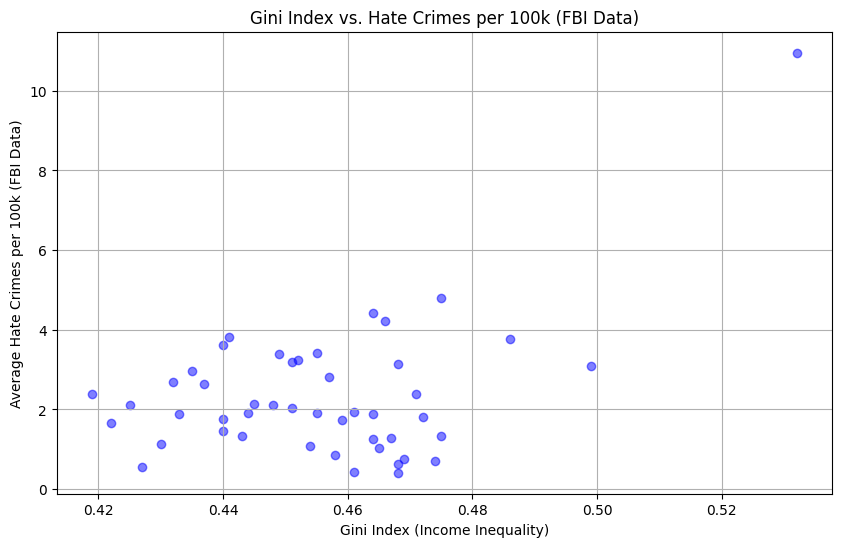

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Scatter plot of Gini index vs. average hate crimes per 100k (FBI data)
plt.figure(figsize=(10, 6))
plt.scatter(data['gini_index'], data['avg_hatecrimes_per_100k_fbi'], color='blue', alpha=0.5)
plt.title('Gini Index vs. Hate Crimes per 100k (FBI Data)')
plt.xlabel('Gini Index (Income Inequality)')
plt.ylabel('Average Hate Crimes per 100k (FBI Data)')
plt.grid(True)
plt.show()


Interpretation
Spread of Data Points: There is a broad spread of hate crime rates for Gini Index values, especially in the middle range. This suggests that income inequality, as measured by the Gini Index, does not have a simple or direct relationship with hate crime rates.

No Clear Trend: There isn't a clear upward or downward trend that we can discern from this plot. The data points don't form a distinct line or curve.

Possible Outlier: There seems to be an outlier or a few outliers at the higher end of hate crime rates which do not follow any visible pattern. These could be due to specific state factors that are not captured by the Gini Index alone.

High Variability: The variability in hate crime rates seems to be high across states with similar Gini Index values. This indicates that other variables, possibly beyond socio-economic factors included in the dataset, might play a significant role in hate crime incidence.

Challenge Question 5: Urbanization and Hate Crimes
Task:
Compare the hate crimes per 100k in states with a high share of the population in metro areas (>80%) to those with a low share (<50%).

In [11]:
# Group states by high and low share of the population in metro areas
high_metro_share = data[data['share_population_in_metro_areas'] > 0.8]
low_metro_share = data[data['share_population_in_metro_areas'] < 0.5]

# Calculate average hate crimes for high metro share group
high_metro_avg_crimes = high_metro_share['avg_hatecrimes_per_100k_fbi'].mean()

# Calculate average hate crimes for low metro share group
low_metro_avg_crimes = low_metro_share['avg_hatecrimes_per_100k_fbi'].mean()

print(f"Average hate crimes per 100k in high metro areas: {high_metro_avg_crimes:.2f}")
print(f"Average hate crimes per 100k in low metro areas: {low_metro_avg_crimes:.2f}")


Average hate crimes per 100k in high metro areas: 2.67
Average hate crimes per 100k in low metro areas: 1.83


The output indicates that states with a higher share of the population living in metropolitan areas have an average of 2.67 hate crimes per 100k, while states with a lower share of the population in metro areas have an average of 1.83 hate crimes per 100k.

Interpretation and Insights:
Urban vs. Rural: There seems to be a higher rate of reported hate crimes in more urbanized states compared to less urbanized ones. This could be due to a variety of factors, including but not limited to:

Density and Diversity: Urban areas tend to be more densely populated and culturally diverse, which might contribute to both the occurrence and the reporting of hate crimes.
Reporting Infrastructure: There could be better infrastructure for reporting and recording crimes in urban areas, leading to higher reported rates.
Social Dynamics: Urban areas may have different social dynamics, including more interactions between people of diverse backgrounds, which could increase the chances of hate crimes occurring.
Considerations: The increased rate in metropolitan areas might not solely reflect a higher incidence of hate crimes, but also better law enforcement reporting and public awareness. Conversely, lower rates in less urbanized areas might be due to underreporting or less awareness.

Key Takeaways:
The data suggests a correlation between urbanization and higher reported rates of hate crimes.
Understanding the causative factors behind this correlation would require a more in-depth analysis, potentially examining cultural, economic, and law enforcement variables.

Challenge Question 6: Education and Hate Crimes
Task:
Investigate the relationship between the share of the population with a high school degree and the average hate crimes per 100k (FBI data).

Correlation between high school education level and hate crimes: 0.177


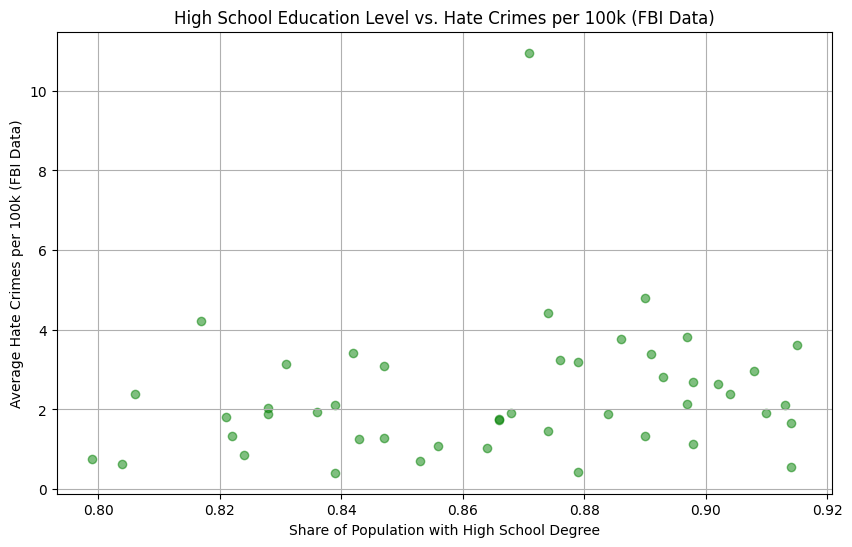

In [13]:
# Calculate the correlation coefficient
education_crime_correlation = data['share_population_with_high_school_degree'].corr(data['avg_hatecrimes_per_100k_fbi'])
print(f"Correlation between high school education level and hate crimes: {education_crime_correlation:.3f}")

# Scatter plot of education level vs. hate crimes
plt.figure(figsize=(10, 6))
plt.scatter(data['share_population_with_high_school_degree'], data['avg_hatecrimes_per_100k_fbi'], color='green', alpha=0.5)
plt.title('High School Education Level vs. Hate Crimes per 100k (FBI Data)')
plt.xlabel('Share of Population with High School Degree')
plt.ylabel('Average Hate Crimes per 100k (FBI Data)')
plt.grid(True)
plt.show()


Observations
Data Distribution: The points are spread out across the plot without a clear linear pattern. This suggests that there isn't a straightforward linear relationship between education level and hate crime rates.

No Obvious Trend: Unlike what some might hypothesize, there is no visible trend that suggests higher education levels correspond to significantly lower hate crime rates across the states.

Cluster of Data Points: There's a noticeable clustering of data points in the middle of the education axis (around 85%-90% high school degree share). However, the hate crime rates for this cluster still vary widely, indicating that factors other than the high school education level may play a more substantial role in determining hate crime rates.

Potential Outliers: There are a few states with particularly high hate crime rates that do not follow the overall pattern of the rest of the data. These outliers may warrant further investigation to understand the specific conditions that lead to these higher rates.

Interpretation Considerations:
Complex Relationship: If education does influence hate crime rates, the relationship is likely complex and not simply linear. It may interact with a range of other socio-economic and cultural factors.
Educational Attainment: While educational attainment is an important factor in social outcomes, its impact on hate crime rates may not be direct or might be overshadowed by other more influential factors.
Further Analysis: A multivariate analysis that includes additional factors like economic conditions, demographic diversity, political climate, and social support systems might yield more insights into the factors that correlate with hate crime rates.

Key Takeaways:
The scatter plot does not show a clear relationship between the proportion of the population with a high school degree and the hate crime rates.
Educational attainment alone, at least at the high school level, does not appear to be a strong predictor of hate crime rates.

Challenge Question 7: Regression Analysis
Task:
Create a regression model to explore the relationship between the share of voters who voted for Trump and hate crimes per 100k (SPLC data).

In [14]:
!pip install statsmodels
import statsmodels.api as sm

# Define the predictor (independent variable) and the response (dependent variable)
X = sm.add_constant(data['share_voters_voted_trump']) # We must add the constant term to include the intercept in the model
Y = data['hate_crimes_per_100k_splc']

# Create the regression model and fit it to the data
model = sm.OLS(Y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 19.5 MB/s eta 0:00:00
                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.432
Model:                                   OLS   Adj. R-squared:                  0.419
Method:                        Least Squares   F-statistic:                     34.19
Date:                       Mon, 27 Nov 2023   Prob (F-statistic):           5.26e-07
Time:                               06:52:36   Log-Likelihood:                 11.746
No. Observations:                         47   AIC:                            -19.49
Df Residuals:                             45   BIC:       

Regression Analysis Interpretation
R-squared (0.432): This value indicates that approximately 43.2% of the variability in hate crime rates per 100k can be explained by the share of voters who voted for Trump. This is a moderate amount of variance explained, which suggests that while there's a relationship, there are also other factors at play that the model doesn't account for.

Coefficient for share_voters_voted_trump (-1.4748): This coefficient is significant (p < 0.001) and negative, meaning that for each additional percentage point of the population that voted for Trump, the hate crime rate per 100k (as reported by SPLC) decreases by approximately 1.475. It's important to note that while the relationship is statistically significant, it doesn't imply causation.

P-value (< 0.001): The p-value for the coefficient of the share_voters_voted_trump variable is less than 0.001, which is highly significant. This means that the likelihood of observing such a strong association by chance is very low, and the variable is statistically significant in predicting hate crime rates.

Confidence Interval: The 95% confidence interval for the share_voters_voted_trump coefficient does not contain zero, further indicating that the relationship is statistically significant.

F-statistic (34.19): The F-statistic is a measure of how well the model fits the data. A higher value indicates a better fit. The associated Prob(F-statistic) suggests the model is statistically significant.

Key Takeaways
There's a statistically significant negative relationship between the share of Trump voters and hate crime rates according to SPLC data.
The model explains a moderate proportion of the variance in hate crime rates, indicating that political leanings are a factor, but not the only one.
The results suggest that states with a higher percentage of Trump voters report fewer hate crimes per capita, but this analysis cannot establish whether this is a cause-and-effect relationship.
Considerations for Interpretation
Causation vs. Correlation: A regression analysis can indicate correlation but not causation. The findings do not mean that voting for Trump causes lower hate crime rates. There may be other underlying factors that contribute to this association.
Model Limitations: The model only includes one predictor variable. Including more variables could give a more comprehensive understanding of what influences hate crime rates.

Challenge Question 8: Poverty and Race Correlations
Task:
Analyze how the share of white poverty correlates with hate crimes per 100k (SPLC data) and compare this with how the share of the non-white population correlates with hate crimes.

In [15]:
# Correlation between white poverty share and hate crimes
white_poverty_crime_correlation = data['share_white_poverty'].corr(data['hate_crimes_per_100k_splc'])
print(f"Correlation between white poverty share and hate crimes: {white_poverty_crime_correlation:.3f}")

# Correlation between non-white share and hate crimes
non_white_crime_correlation = data['share_non_white'].corr(data['hate_crimes_per_100k_splc'])
print(f"Correlation between non-white share and hate crimes: {non_white_crime_correlation:.3f}")


Correlation between white poverty share and hate crimes: -0.286
Correlation between non-white share and hate crimes: 0.048


White Poverty Share and Hate Crimes (-0.286):
This negative correlation suggests that states with a higher proportion of white poverty have a slightly lower rate of hate crimes per 100k, as reported by SPLC. However, the correlation is not very strong. It's counterintuitive because one might expect that economic hardship could lead to higher crime rates, including hate crimes. This could indicate that other factors, perhaps cultural or social, play a more significant role in the prevalence of hate crimes than economic hardship among the white population alone.


Non-White Share and Hate Crimes (0.048):
The correlation here is very weak and positive, indicating that there is virtually no linear relationship between the proportion of the non-white population and hate crime rates in this dataset. This suggests that the racial composition, in terms of the non-white population share, is not a strong predictor of hate crime rates.


Interpretation and Insights:
Complex Socio-Economic Dynamics: These correlations imply that the relationship between poverty, race, and hate crimes is complex. Simple economic or demographic models may not be sufficient to predict hate crime rates.
Potential for Confounding Factors: There may be confounding factors that influence these correlations. For example, states with higher white poverty rates may have other social dynamics at play that could impact hate crime rates, such as different levels of social cohesion or different patterns of race relations.
Limitation of Bivariate Analysis: Just like with the previous analyses, it's important to remember that these are bivariate correlations and do not account for the potential interplay between multiple factors.


Key Takeaways:
The data does not support a simple narrative that higher poverty among the white population is associated with higher hate crime rates.
The share of the non-white population does not have a significant correlation with hate crime rates, suggesting the need for more nuanced analysis that considers a broader range of socio-economic and cultural factors.

Challenge Question 9: Non-Citizen Population Impact
Task:
Investigate if there’s a significant difference in hate crime rates in states with high non-citizen population (>10%) compared to those with low non-citizen population (<5%).

In [16]:
# Group states by high and low non-citizen population
high_non_citizen_share = data[data['share_non_citizen'] > 0.1]
low_non_citizen_share = data[data['share_non_citizen'] < 0.05]

# Calculate average hate crimes for high non-citizen share group
high_non_citizen_avg_crimes = high_non_citizen_share['avg_hatecrimes_per_100k_fbi'].mean()

# Calculate average hate crimes for low non-citizen share group
low_non_citizen_avg_crimes = low_non_citizen_share['avg_hatecrimes_per_100k_fbi'].mean()

print(f"Average hate crimes per 100k in states with high non-citizen population: {high_non_citizen_avg_crimes:.2f}")
print(f"Average hate crimes per 100k in states with low non-citizen population: {low_non_citizen_avg_crimes:.2f}")


Average hate crimes per 100k in states with high non-citizen population: 4.63
Average hate crimes per 100k in states with low non-citizen population: 1.96


The output shows that states with a higher non-citizen population (>10%) have an average of 4.63 hate crimes per 100k, which is more than double the average of 1.96 hate crimes per 100k in states with a lower non-citizen population (<5%).

Interpretation and Insights:
Higher Rates in States with More Non-Citizens: This could suggest that areas with higher non-citizen populations might experience more hate crimes. This might be due to a variety of factors, including social tensions, xenophobia, or even just greater diversity and more opportunities for conflict. Alternatively, it could also be due to better reporting or more robust mechanisms for tracking hate crimes in states with more diverse populations.

Contextual Considerations: States with higher non-citizen populations might also have larger urban areas, which, as seen earlier, tend to have higher hate crime rates. Moreover, these states might be more politically liberal, have different policies, or have different levels of resources dedicated to hate crime prevention and reporting.

Reporting and Awareness: There's also the possibility that increased awareness and reporting mechanisms in states with more non-citizens lead to higher documented rates of hate crimes. This doesn't necessarily mean that the actual incidence rate is higher; it could mean that it's more accurately reported.

Key Takeaways:
The data suggests a correlation between the size of the non-citizen population and hate crime rates, but it's important to consider the broader context.
This analysis doesn't imply causation, and further investigation into the causal factors is necessary.
The findings raise important questions for policymakers and social workers, such as how to ensure the safety and integration of non-citizen populations and how to encourage accurate hate crime reporting across all states.